In [2]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [68]:
import pandas as pd
from testmining.apfd_plot import read_apfd
from testmining import folders

dfs = []
for project_name, project_path in folders.projects():
    df = read_apfd(project_path).filter(regex='^(?!travisJobId).*$')
    dfs.append(pd.concat([pd.Series({'project': project_name}), df.median()]))

df = pd.DataFrame(dfs)
df = df.melt(id_vars=['project'], var_name='strategy', value_name='apfd')
df.head()

,project,strategy,apfd
0,neuland@jade4j,random,0.495299
1,facebook@buck,random,0.488789
2,apache@sling,random,0.505671
3,DSpace@DSpace,random,0.485794
4,SonarSource@sonarqube,random,0.500000


In [69]:
display(pd.DataFrame(df['project'].value_counts()))
display(pd.DataFrame(df['strategy'].value_counts()))

,project
apache@sling,14
thinkaurelius@titan,14
facebook@buck,14
Graylog2@graylog2-server,14
adamfisk@LittleProxy,14
julianhyde@optiq,14
jOOQ@jOOQ,14
jcabi@jcabi-github,14
deeplearning4j@deeplearning4j,14
DSpace@DSpace,14


,strategy
matrix-path-similarity,20
matrix-conditional-prob,20
recently-failed,20
optimal-failure,20
untreated,20
bloom,20
optimal-failure-duration,20
matrix-naive,20
matrix-file-similarity,20
lru,20


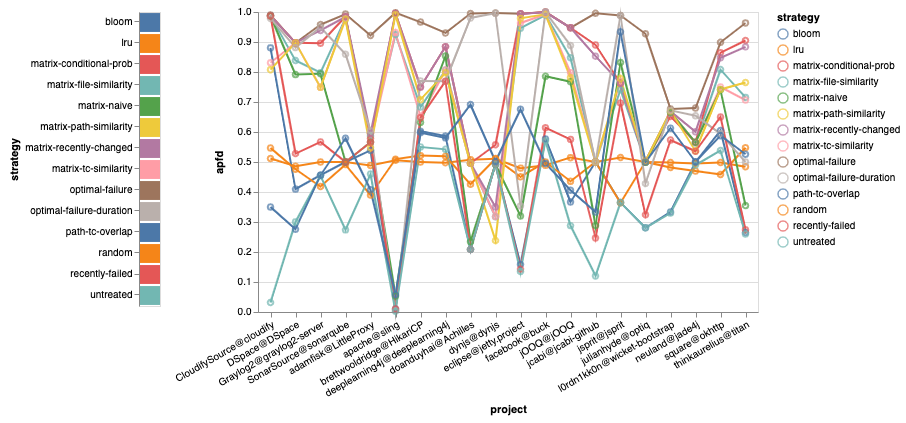

In [70]:
import altair as alt
import pandas as pd

strategies_df = pd.DataFrame({'strategy': df['strategy'].unique()})

selection = alt.selection_multi(fields=['strategy'])
color = alt.condition(selection, alt.Color('strategy:N'), alt.value('lightgray'))
strategy_selector = alt.Chart(strategies_df).mark_rect().encode(y='strategy', color=color).add_selection(selection)

strategy_line = alt.Chart(df).mark_line().encode(
  x=alt.X('project', axis=alt.Axis(labelAngle=-30)),
  y=alt.Y('apfd', scale=alt.Scale(domain=[0, 1])),
  color='strategy',
).transform_filter(selection)

strategy_point = alt.Chart(df).mark_point().encode(
  x=alt.X('project', axis=alt.Axis(labelAngle=-30)),
  y=alt.Y('apfd', scale=alt.Scale(domain=[0, 1])),
  color='strategy',
  tooltip=['project', 'strategy', 'apfd']).transform_filter(selection)

strategy_selector | (strategy_line + strategy_point).properties(width=500)